<a href="https://colab.research.google.com/github/juyounLee/Tensorflow2.0/blob/main/5_2_classification_wine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

# load the data

red = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')
white = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=';')

In [2]:
# combine the data

red['type'] = 0
white['type'] = 1

wine = pd.concat([red, white])
print(wine.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 710.6 KB
None


6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64


(array([  30.,  216., 2138., 2836., 1079.,  193.,    5.]),
 array([3.        , 3.85714286, 4.71428571, 5.57142857, 6.42857143,
        7.28571429, 8.14285714, 9.        ]),
 <a list of 7 Patch objects>)

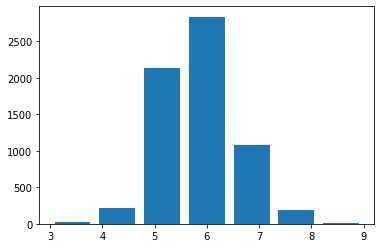

In [3]:
# count the number of quality
print(wine['quality'].value_counts())

plt.hist(wine['quality'], bins=7, rwidth=0.8)

In [4]:
# quality 3~5: Bad, quality 7~9: Good, and quatliy 6: Average

wine.loc[wine['quality'] <= 5, 'new_quality'] = 0
wine.loc[wine['quality'] == 6, 'new_quality'] = 1
wine.loc[wine['quality'] >=7, 'new_quality'] = 2

In [5]:
# normalize the data

del wine['quality']

wine_norm = (wine - wine.min()) / (wine.max() - wine.min())
wine_shuffle = wine_norm.sample(frac=1)
wine_np = wine_shuffle.to_numpy()

In [6]:
# split the train and test set

train_index = int(len(wine_np) * 0.8)
train_X = wine_np[:train_index, :-1]
train_y = wine_np[:train_index, -1]

test_X = wine_np[train_index:, :-1]
test_y = wine_np[train_index:, -1]

In [7]:
# categorize

train_y = tf.keras.utils.to_categorical(train_y, num_classes=3)
test_y = tf.keras.utils.to_categorical(test_y, num_classes=3)

In [8]:
print(train_X.shape)
print(test_X.shape)

(5197, 12)
(1300, 12)


In [9]:
# build the model

model = tf.keras.Sequential([
                             tf.keras.layers.Dense(units=48, activation='relu', input_shape=(12, )),
                             tf.keras.layers.Dense(units=24, activation='relu'),
                             tf.keras.layers.Dense(units=12, activation='relu'),
                             tf.keras.layers.Dense(units=3, activation='softmax')
])

model.compile(optimizer = tf.keras.optimizers.Adam(lr=0.07), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_X, train_y, epochs=25, batch_size=32, validation_split=0.25)

Epoch 1/25
122/122 [==============================] - 0s 4ms/step - loss: 0.4563 - accuracy: 0.7975 - val_loss: 0.4187 - val_accuracy: 0.8054
Epoch 2/25
122/122 [==============================] - 0s 3ms/step - loss: 0.4253 - accuracy: 0.8024 - val_loss: 0.4355 - val_accuracy: 0.8023
Epoch 3/25
122/122 [==============================] - 0s 3ms/step - loss: 0.4088 - accuracy: 0.8127 - val_loss: 0.4518 - val_accuracy: 0.7885
Epoch 4/25
122/122 [==============================] - 0s 3ms/step - loss: 0.4211 - accuracy: 0.7960 - val_loss: 0.4214 - val_accuracy: 0.8054
Epoch 5/25
122/122 [==============================] - 0s 3ms/step - loss: 0.4035 - accuracy: 0.8106 - val_loss: 0.4088 - val_accuracy: 0.8154
Epoch 6/25
122/122 [==============================] - 0s 3ms/step - loss: 0.4033 - accuracy: 0.8060 - val_loss: 0.4146 - val_accuracy: 0.8185
Epoch 7/25
122/122 [==============================] - 0s 3ms/step - loss: 0.4007 - accuracy: 0.8109 - val_loss: 0.4409 - val_accuracy: 0.8154
Epoch 

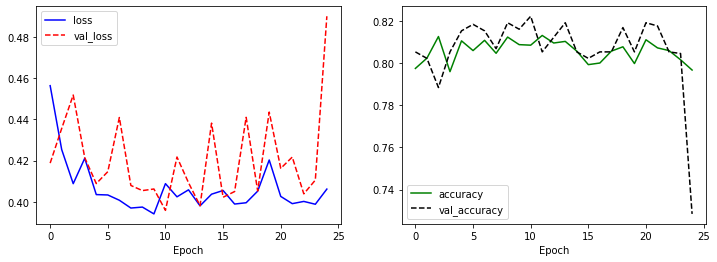

In [10]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'] ,'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.legend()

In [11]:
model.evaluate(test_X, test_y)

41/41 [==============================] - 0s 2ms/step - loss: 0.4831 - accuracy: 0.7385


[0.4831421375274658, 0.7384615540504456]